# Deep learning Model of EEG Data Analysis 

## Importing Libraries

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## *Reading* the datasets

### What Dataset are we using ?
https://www.kaggle.com/datasets/wanghaohan/confused-eeg

### What does confusion have anything to do with Dyslexia?
* Confusion is an important factor to detect Dyslexia
* When dyslexic people make mistakes in reading or spelling, it is because they are experiencing disorientation
* The person’s threshold for confusion is a key factor in how often he or she disorients.

In [22]:
df=pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

## Preprocessing the Data for running in Deep learning framework
#### Merging the datasets on Subject-ID and editting (some of the columns-names had some extra space before them)

In [23]:
data = data.rename(columns = {'subject ID': 'SubjectID',' gender':'gender',' age':'age',' ethnicity':'ethnicity'})
df = df.merge(data,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Further processing to make the dataset proper before running through our model
1. See the shape
2. Find the missing columns
3. Convert the String data-type columns to Numerical ones
4. Check for imbalanced data-sets

In [24]:
df.shape

(12811, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

In [26]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

#### Converting the Categorical columns to numerical ones

In [27]:
df['gender']=df['gender'].replace({'M':1,'F':0})
df['ethnicity']=df['ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

In [28]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,0,1


In [29]:
df['VideoID'].value_counts()

1.0    1414
0.0    1412
4.0    1356
9.0    1281
8.0    1280
2.0    1274
5.0    1230
3.0    1206
6.0    1181
7.0    1177
Name: VideoID, dtype: int64

#### Checking for *Imbalanced-dataset*

In [30]:
df['predefinedlabel'].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [31]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)

In [32]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.301538,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.641169,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,2.000000,1.000000


## Identifying Target Variable : **Attention vs Mediation**

### What is Mediation?
* ##### Active Learning vs Passive Learning
* ##### Mediated Learning Experience
* ##### Absent Property in Confused Students

## Feature Identification
####  *EDA* to Identify the Feature-columns that are aligned with our *Target*-class

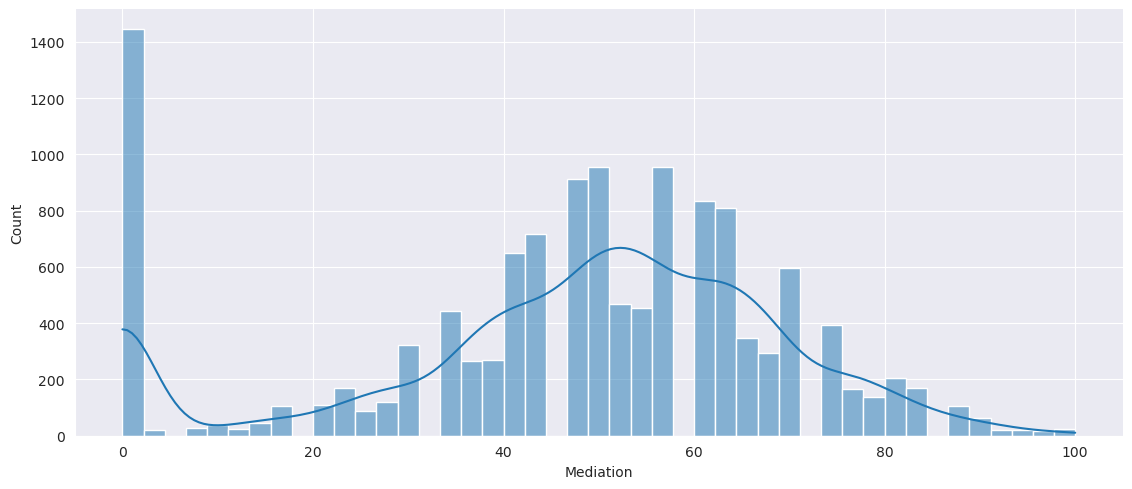

In [33]:
sns.set_style('darkgrid')
sns.displot(data=df,x='Mediation',kde=True,aspect=16/7)

#### Analyzing direct interference between Mediation and other features

<AxesSubplot: xlabel='Mediation', ylabel='Attention'>

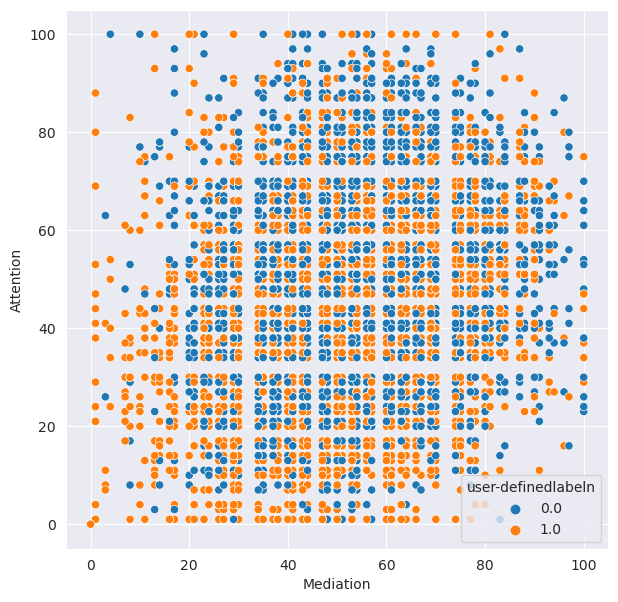

In [34]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Attention',hue='user-definedlabeln')

<AxesSubplot: xlabel='Mediation', ylabel='Raw'>

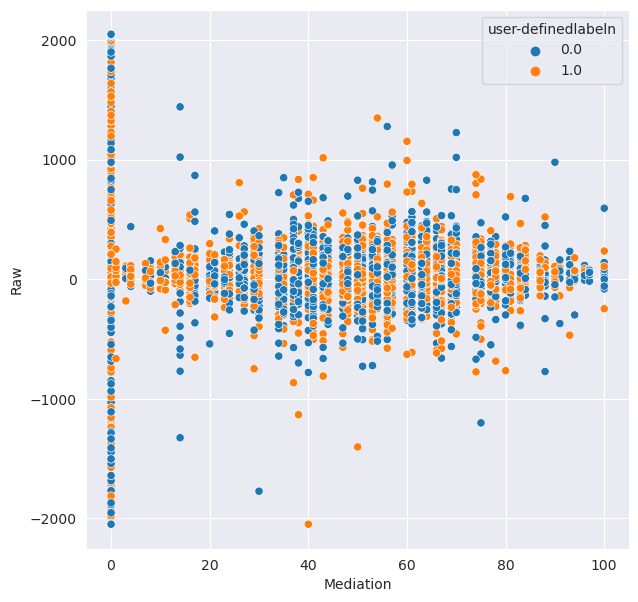

In [35]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Raw',hue='user-definedlabeln')

<AxesSubplot: xlabel='Mediation', ylabel='Theta'>

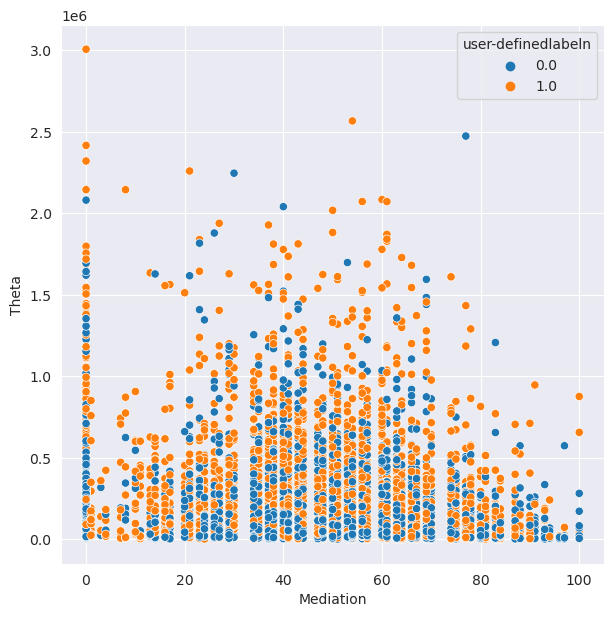

In [36]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Theta',hue='user-definedlabeln')

<AxesSubplot: xlabel='Mediation', ylabel='Alpha1'>

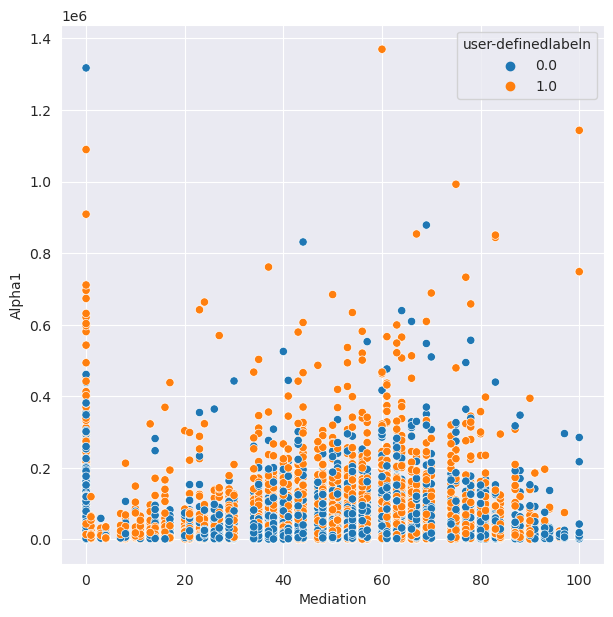

In [37]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Alpha1',hue='user-definedlabeln')

<AxesSubplot: xlabel='Mediation', ylabel='Gamma1'>

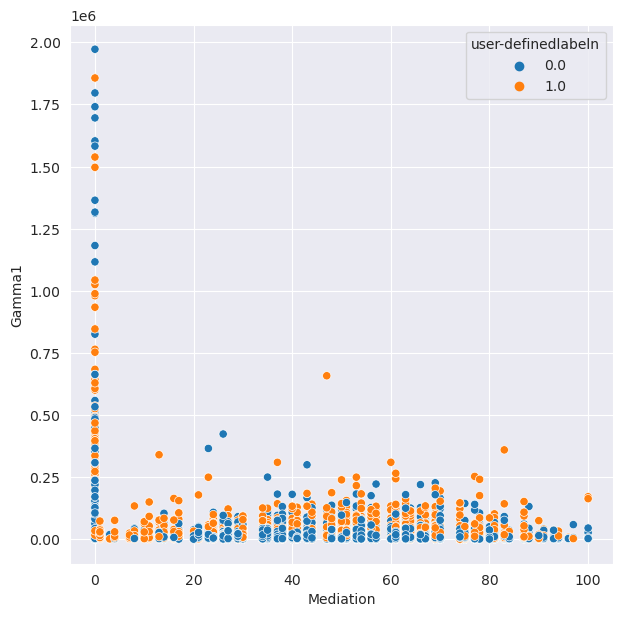

In [38]:
fig,ax=plt.subplots(figsize=(7,7))
sns.scatterplot(data=df,x='Mediation',y='Gamma1',hue='user-definedlabeln')

## No *direct* interference has been identified between Features and Target-variable

#### Importing library to perform Feature-Selection 

In [16]:
from sklearn.feature_selection import mutual_info_classif

### Separating-out feature-set and `Target-column` 

### Mutual-info gives the score to each **Feature** which describes its *Relationship* with `Target` variable

In [115]:
mi_score=mutual_info_classif(df.drop('user-definedlabeln',axis=1),df['user-definedlabeln'])
mi_score=pd.Series(mi_score,index=df.drop('user-definedlabeln',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

VideoID            5.815151
Alpha2             2.660614
Delta              2.425358
Gamma1             2.423295
Theta              2.156932
Alpha1             2.104711
Beta1              2.010443
Gamma2             1.924753
Attention          1.621567
SubjectID          1.569394
Raw                1.452686
Beta2              1.355821
age                0.565039
Mediation          0.092141
predefinedlabel    0.000000
ethnicity          0.000000
gender             0.000000
dtype: float64

### Selecting top-14 features

In [116]:
mi_score.head(14).index

Index(['VideoID', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Alpha1', 'Beta1',
       'Gamma2', 'Attention', 'SubjectID', 'Raw', 'Beta2', 'age', 'Mediation'],
      dtype='object')

In [117]:
top_fea=['VideoID', 'Alpha2', 'Delta', 'Gamma1', 'Theta', 'Beta1', 'Alpha1',
       'Attention', 'Gamma2', 'Raw', 'Beta2', 'SubjectID', 'Mediation', 'age']

# Scaling our *Feature*-set

In [118]:
from sklearn.preprocessing import StandardScaler
df_sc=StandardScaler().fit_transform(df[top_fea])

# Importing libraries to build **Neural-Network**

In [24]:
# !conda install -c conda-forge tensorflow --yes

In [119]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

### *Splitting* the dataset into:
1. Training_Features, Training_Target
2. Testing_Features, Testing_Target
3. Validation_Features, Validation_Target

In [120]:
from sklearn.model_selection import train_test_split
y=df['user-definedlabeln']
Xtr,xte,Ytr,yte=train_test_split(df_sc,y,random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(Xtr,Ytr,random_state=108,test_size=0.27)

## Running the Training Data into our Neural Network model

In [123]:
inputs = tf.keras.Input(shape=(Xtr.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
             )
batch_size=32
epochs=50
history=model.fit(
            Xtr,
            Ytr,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/50
234/234 [==============================] - 3s 10ms/step - loss: 0.6240 - accuracy: 0.6515 - auc: 0.7096 - val_loss: 0.5764 - val_accuracy: 0.6980 - val_auc: 0.7660 - lr: 0.0010
Epoch 2/50
234/234 [==============================] - 3s 13ms/step - loss: 0.5640 - accuracy: 0.7002 - auc: 0.7775 - val_loss: 0.5540 - val_accuracy: 0.7119 - val_auc: 0.7960 - lr: 0.0010
Epoch 3/50
234/234 [==============================] - 2s 8ms/step - loss: 0.5267 - accuracy: 0.7339 - auc: 0.8114 - val_loss: 0.5349 - val_accuracy: 0.7285 - val_auc: 0.8113 - lr: 0.0010
Epoch 4/50
234/234 [==============================] - 2s 8ms/step - loss: 0.4895 - accuracy: 0.7590 - auc: 0.8412 - val_loss: 0.4770 - val_accuracy: 0.7638 - val_auc: 0.8556 - lr: 0.0010
Epoch 5/50
234/234 [==============================] - 3s 13ms/step - loss: 0.4385 - accuracy: 0.7916 - auc: 0.8787 - val_loss: 0.4425 - val_accuracy: 0.7910 - val_auc: 0.8744 - lr: 0.0010
Epoch 6/50
234/234 [==============================] - 3s 11ms/

### Validating the model through Validation data

## Testing Accuracy of the Model

In [124]:
model.evaluate(xte,yte)

109/109 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9821 - auc: 0.9962


[0.06824848800897598, 0.9820757508277893, 0.9961684346199036]

In [125]:
y_true = np.array(yte)

y_pred = np.squeeze(model.predict(xte))
y_pred = np.array(y_pred >=0.5, dtype=np.int)
y_pred

109/109 [==============================] - 1s 4ms/step


/tmp/ipykernel_1470/3286299504.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >=0.5, dtype=np.int)


array([1, 1, 1, ..., 0, 1, 0])

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

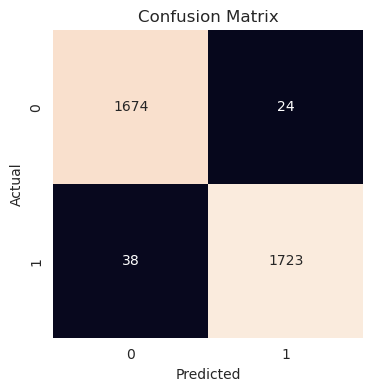

In [127]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [128]:
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.99      0.98      1698\n         1.0       0.99      0.98      0.98      1761\n\n    accuracy                           0.98      3459\n   macro avg       0.98      0.98      0.98      3459\nweighted avg       0.98      0.98      0.98      3459\n'

In [129]:
training=pd.DataFrame(history.history)

### Plotting the history of Neural-Network

<AxesSubplot: >

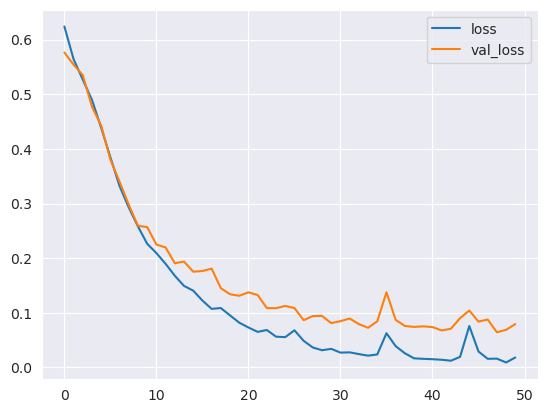

In [130]:
training.loc[:,['loss','val_loss']].plot()

<AxesSubplot: >

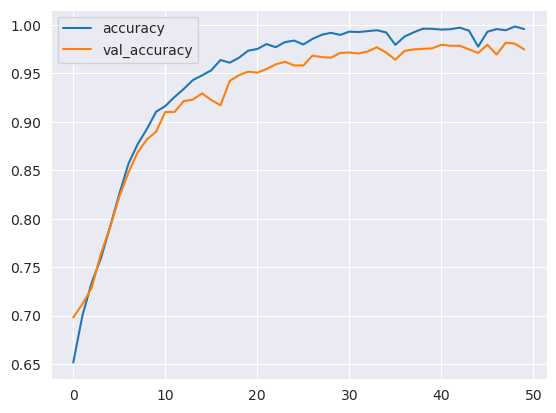

In [131]:
training.loc[:,['accuracy','val_accuracy']].plot()

# How to Use this Model for Identifying Dyslexia ?

* #### When we get EEG data of people who are made to watch educational videos, we can get their RAW EEG signal and various frequency signals that it is composed of. 
* #### We can then use this to predict the Mediation/Attention of the person. 
* #### If we have enough dyslexic people in our training data sample, we can identify a cut off limit of the target feature and hence would be able to perform Diagnosis of Dyslexia based on whether the person's Mediation/Attention lies outside the cut-off limit.